In [229]:
# define libraries to use
import pandas as pd
import numpy as np
#from pathlib import Path
import requests,json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as sp
%matplotlib inline
import pickle

pd.options.display.max_columns = None

def millions(x,pos=0):
    return '%1.1fM' % (float(x) * 1e-6)
    #return type(x)


In [230]:
nydmvVinDecodeDf = pd.read_pickle("tmp/nydmv-vindecodedf.pkl")
nydmvVinDecodeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11351609 entries, 0 to 11351608
Data columns (total 40 columns):
 #   Column                            Non-Null Count     Dtype  
---  ------                            --------------     -----  
 0   entry                             11351609 non-null  int64  
 1   ORIG_VIN                          11351609 non-null  object 
 2   CurbWeightLB                      168899 non-null    float64
 3   Doors                             8836709 non-null   float64
 4   EngineCylinders                   9949497 non-null   float64
 5   MakeID                            11180031 non-null  float64
 6   ModelID                           11099795 non-null  float64
 7   ModelYear                         11168778 non-null  float64
 8   Seats                             3482798 non-null   float64
 9   Series                            7383265 non-null   object 
 10  Series2                           2570707 non-null   object 
 11  Trim                  

In [231]:
farsVehVpicMergeDf = pd.read_pickle("tmp/fars-vehvpicmergedf.pkl")
farsAccidentDf = pd.read_pickle("tmp/fars-accidentdf.pkl")
# add STATE to farsVehVpicMergeDf
farsVehVpicMergeDf = pd.merge(farsVehVpicMergeDf,farsAccidentDf[["ST_CASE","STATE"]],on="ST_CASE")
farsVehVpicMergeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51435 entries, 0 to 51434
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           51435 non-null  int64  
 1   VEH_NO                            51435 non-null  int64  
 2   NUMOCCS                           51435 non-null  int64  
 3   MAKE                              51435 non-null  int64  
 4   MAK_MOD                           51435 non-null  int64  
 5   BODY_TYP                          51435 non-null  int64  
 6   MOD_YEAR                          51435 non-null  int64  
 7   VIN                               51435 non-null  object 
 8   TOW_VEH                           51435 non-null  int64  
 9   TRAV_SP                           51435 non-null  int64  
 10  ROLLOVER                          51435 non-null  int64  
 11  M_HARM                            51435 non-null  int64  
 12  DR_P

In [232]:
f = open("tmp/fars-categories.pkl","rb")
farsCategories = pickle.load(f)
f.close()

In [233]:
farsCategories.keys()

dict_keys(['STATE', 'MONTH', 'DAY_WEEK', 'ROUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV', 'MAN_COLL', 'LGT_COND', 'WEATHER', 'NUMOCCS', 'MAKE', 'MAK_MOD', 'BODY_TYP', 'TOW_VEH', 'TRAV_SP', 'ROLLOVER', 'M_HARM', 'DR_PRES', 'L_STATUS', 'L_TYPE', 'PREV_ACC', 'PREV_DWI', 'PREV_SPD', 'PREV_OTH', 'SPEEDREL', 'VSURCOND', 'P_CRASH2', 'ACC_TYPE', 'DR_DRINK', 'VPICMAKE', 'VPICMODEL', 'VPICBODYCLASS', 'GVWR_FROM', 'GVWR_TO', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE', 'AIR_BAG', 'EJECTION', 'LOCATION', 'PNUMOCCS', 'PTYPE', 'PMAKE', 'PMAK_MOD', 'PTRAILER', 'PM_HARM', 'PBPTYPE', 'PBAGE', 'PBSEX', 'AOI1', 'AOI2', 'CRASHRF', 'DRIVERRF', 'DRDISTRACT', 'DRIMPAIR', 'VEHICLECC', 'VISION', 'NMCC', 'VehicleTypeId', 'ManufacturerFullNameId', 'MakeId', 'ModelId', 'BodyClassId', 'GrossVehicleWeightRatingFromId', 'GrossVehicleWeightRatingToId', 'ForwardCollisionWarningId', 'DynamicBrakeSupportId', 'CrashImminentBrakingID', 'PedestrianAutoEmergencyBrakingId', 'BlindSpotWarningId', 'BlindSpotInterventionId', 

In [234]:
farsCategories["GVWR_FROM"]

{11: 'Class 1: 6,000 lbs. or less (2,722 kg or less)',
 12: 'Class 2: 6,001 - 10,000 lbs. (2,722 - 4,536 kg)',
 18: 'Class 8: 33,001 lbs. and above (14,969 kg and above)',
 15: 'Class 5: 16,001 - 19,500 lbs. (7,258 - 8,845 kg)',
 17: 'Class 7: 26,001 - 33,000 lbs. (11,794 - 14,969 kg)',
 13: 'Class 3: 10,001 - 14,000 lbs. (4,536 - 6,350 kg)',
 99: 'Reported as Unknown',
 16: 'Class 6: 19,501 - 26,000 lbs. (8,845 - 11,794 kg)',
 14: 'Class 4: 14,001 - 16,000 lbs. (6,350 - 7,258 kg)',
 98: 'Not Reported'}

In [235]:
farsCategories["GrossVehicleWeightRatingFromId"]

{nan: nan,
 14.0: 'Class 2E: 6,001 - 7,000 lb (2,722 - 3,175 kg)',
 9.0: 'Class 8: 33,001 lb and above (14,969 kg and above)',
 15.0: 'Class 2F: 7,001 - 8,000 lb (3,175 - 3,629 kg)',
 13.0: 'Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)',
 11.0: 'Class 1B: 3,001 - 4,000 lb (1,360 - 1,814 kg)',
 6.0: 'Class 5: 16,001 - 19,500 lb (7,258 - 8,845 kg)',
 17.0: 'Class 2H: 9,001 - 10,000 lb (4,082 - 4,536 kg)',
 12.0: 'Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)',
 8.0: 'Class 7: 26,001 - 33,000 lb (11,794 - 14,969 kg)',
 16.0: 'Class 2G: 8,001 - 9,000 lb (3,629 - 4,082 kg)',
 10.0: 'Class 1A: 3,000 lb or less (1,360 kg or less)',
 4.0: 'Class 3: 10,001 - 14,000 lb (4,536 - 6,350 kg)',
 1.0: 'Class 1: 6,000 lb or less (2,722 kg or less)',
 7.0: 'Class 6: 19,501 - 26,000 lb (8,845 - 11,794 kg)',
 2.0: 'Class 2: 6,001 - 10,000 lb (2,722 - 4,536 kg)',
 5.0: 'Class 4: 14,001 - 16,000 lb (6,350 - 7,258 kg)'}

## Eliminate Motorcycles, Buses, Off-Road Vehicles, Low-Speed Vehicles, Others

In [236]:
vpicBodyToRemove = [
    16, 68, 73, # Buses
    6, 12, 80, 81, 82, 83, 85, 87, 90, 94, 98, 100, 103, 104, 109, 110, 114, 125, 996, # Motorcycles
    69, 84, 86, 88, 97, 105, 113, 124, 126, 127, # off-road vehicles
    4, # low-speed vehiches
    108, 117, # Other
    61, # Trailers
    62, 63, 64, 65, 67, 70, 71, 72, 74, 75, 76, 77, 78, 107, 112, # Incomplete Body class (unfinished)
]

In [237]:
farsVehVpicMergeDf = farsVehVpicMergeDf[~farsVehVpicMergeDf["VPICBODYCLASS"].isin(vpicBodyToRemove)]
farsVehVpicMergeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44922 entries, 0 to 51434
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ST_CASE                           44922 non-null  int64  
 1   VEH_NO                            44922 non-null  int64  
 2   NUMOCCS                           44922 non-null  int64  
 3   MAKE                              44922 non-null  int64  
 4   MAK_MOD                           44922 non-null  int64  
 5   BODY_TYP                          44922 non-null  int64  
 6   MOD_YEAR                          44922 non-null  int64  
 7   VIN                               44922 non-null  object 
 8   TOW_VEH                           44922 non-null  int64  
 9   TRAV_SP                           44922 non-null  int64  
 10  ROLLOVER                          44922 non-null  int64  
 11  M_HARM                            44922 non-null  int64  
 12  DR_P

In [238]:
nydmvVinDecodeDf
nydmvVinDecodeDf = nydmvVinDecodeDf[~nydmvVinDecodeDf["BodyClassId"].isin(vpicBodyToRemove)]
nydmvVinDecodeDf.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10719802 entries, 0 to 11351608
Data columns (total 40 columns):
 #   Column                            Non-Null Count     Dtype  
---  ------                            --------------     -----  
 0   entry                             10719802 non-null  int64  
 1   ORIG_VIN                          10719802 non-null  object 
 2   CurbWeightLB                      168896 non-null    float64
 3   Doors                             8806924 non-null   float64
 4   EngineCylinders                   9435778 non-null   float64
 5   MakeID                            10548224 non-null  float64
 6   ModelID                           10470138 non-null  float64
 7   ModelYear                         10541169 non-null  float64
 8   Seats                             3479284 non-null   float64
 9   Series                            7064193 non-null   object 
 10  Series2                           2558288 non-null   object 
 11  Trim                  

Next steps:
1) FARS vpicdecode, see if GVWR_FROM can be infered from Model/Year/Trim/Series... from NYSDMV values
2) get vehicle grouping finalized

## FARS vpicdecode, see if GVWR_FROM can be infered from Model/Year/Trim/Series... from NYSDMV values

In [239]:
# check if model numbers are unique across makes
tmp1 = nydmvVinDecodeDf[["MakeID","ModelID"]].dropna().drop_duplicates()
if (tmp1["ModelID"].value_counts() > 1).sum() == 0:
    print("VPIC ModelIDs are Unique Across Manufacturers")
else:
    print("***************************************************************************")
    print("VPIC ModelIDs are NOT Unique Across Manufacturers!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("***************************************************************************")


VPIC ModelIDs are Unique Across Manufacturers


In [240]:
# check how many vehicles have missing GVWR_FROM in all states
print("FARS Vehicles missing GVWR: ", farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna().sum())
print("FARS Cases with Vehicles missing GVWR: ", farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["ST_CASE"]].drop_duplicates().count().values[0])

FARS Vehicles missing GVWR:  15987
FARS Cases with Vehicles missing GVWR:  14123


In [241]:
# check how many vehicles have missing GVWR_FROM in NY state
print("FARS NYS Vehicles missing GVWR:",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (farsVehVpicMergeDf["STATE"] == 36)][["STATE"]].value_counts().values[0])
print("FARS NYS Cases with Vehicles missing GVWR: ",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna() & (farsVehVpicMergeDf["STATE"] == 36)][["ST_CASE"]].drop_duplicates().count().values[0])

FARS NYS Vehicles missing GVWR: 398
FARS NYS Cases with Vehicles missing GVWR:  353


In [242]:
print("FARS Models missing GVWR\n",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL"]].value_counts().sort_values(ascending=False))
print("FARS Total Models missing GVWR = ",farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL"]].drop_duplicates().count().values[0])

FARS Models missing GVWR
 VPICMODEL
2469         1013
2208          734
1904          697
1833          575
1834          548
             ... 
14216           1
14185           1
23521           1
20813           1
28077           1
Length: 459, dtype: int64
FARS Total Models missing GVWR =  459


In [243]:
print("NYSDMV Model IDs found:\n",nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["ModelID"]].value_counts().sort_values(ascending=False))

NYSDMV Model IDs found:
 ModelID
1865.0     317149
1850.0     267923
2217.0     254554
1861.0     249782
1863.0     221255
            ...  
2193.0          1
2728.0          1
14091.0         1
2480.0          1
23941.0         1
Length: 1266, dtype: int64


In [244]:
# fars Vehicles with no weight
#farsModelsNoWeight = farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL","VPICBODYCLASS"]].drop_duplicates().dropna()
farsModelsNoWeight = farsVehVpicMergeDf[farsVehVpicMergeDf["GrossVehicleWeightRatingFromId"].isna()][["VPICMODEL","Trim"]].drop_duplicates().dropna()
farsModelsNoWeight

,VPICMODEL,Trim
0,2475,300
124,1895,Police
137,2735,SE Base
166,2208,L/LE/SE/XLE/XSE
188,2053,200C
...,...,...
50249,6093,L
50400,2232,Premium + M/R + CWP
50449,6495,H Series
50468,14553,Royale Brougham


In [245]:
# nydmv models that have 1:1 mapping to GVWF
# NOTE: after trial/error trim/series do not help in comin up with 1:1 mappings 
#
#tmp1 = nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["ModelID","Trim","GrossVehicleWeightRatingFromId"]].drop_duplicates()[["ModelID","Trim"]].value_counts()
#tmp1 = nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["MakeID","ModelID","BodyClassId","GrossVehicleWeightRatingFromId"]].drop_duplicates()
tmp1 = nydmvVinDecodeDf[~nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].isna()][["MakeID","ModelID","BodyClassId","GrossVehicleWeightRatingFromId"]].drop_duplicates().dropna()[["ModelID","BodyClassId","GrossVehicleWeightRatingFromId"]]
tmp1["ModelID"] = tmp1["ModelID"].astype("int64")
tmp1["BodyClassId"] = tmp1["BodyClassId"].astype("int64")
tmp1["GrossVehicleWeightRatingFromId"] = tmp1["GrossVehicleWeightRatingFromId"].astype("int64")
tmp2 = tmp1[["ModelID","BodyClassId"]].value_counts()
#tmp1["Trim"] = tmp1["Trim"].fillna("")
#print(tmp1[tmp1["ModelID"]==1938])
#tmp1[["MakeID","ModelID","BodyClassId","Trim"]].value_counts()
#tmp1[["MakeID","ModelID","BodyClassId"]].value_counts()
#tmp1.index[tmp1 == 1].astype("int64")
tmp3 = tmp1.set_index(["ModelID","BodyClassId"])
nydmvModelWeight = tmp3.loc[tmp2.index[tmp2 == 1]]
nydmvModelWeight

,,GrossVehicleWeightRatingFromId
ModelID,BodyClassId,
9598,11,9
13936,11,9
9599,11,9
13934,11,9
13630,7,12
...,...,...
4598,119,16
4603,7,14
4632,11,9


In [246]:
#farsVehVpicMergeDf["set_VPICMODEL_GVWR"] = farsVehVpicMergeDf[["VPICMODEL","GrossVehicleWeightRatingFromId"]].apply(tuple,axis=1)
farsVehVpicMergeDf["set_VPICMODEL_GVWR"] = farsVehVpicMergeDf[["VPICMODEL","GrossVehicleWeightRatingFromId"]].apply(lambda row: (np.int64(row["VPICMODEL"]) if ~np.isnan(row["VPICMODEL"]) else np.nan, np.int64(row["GrossVehicleWeightRatingFromId"]) if ~np.isnan(row["GrossVehicleWeightRatingFromId"]) else np.nan),axis=1)
farsVehVpicMergeDf[farsVehVpicMergeDf["set_VPICMODEL_GVWR"].isin(set(nydmvModelWeight.index))]
#farsVehVpicMergeDf["set_VPICMODEL_GVWR"]




,ST_CASE,VEH_NO,NUMOCCS,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,VIN,TOW_VEH,TRAV_SP,...,AdaptiveCruiseControlId,AntilockBrakeSystemId,ElectronicStabilityControlId,TPMSId,TractionControlId,AutoPedestrianAlertingSoundId,AnySafetyFeature,GoodVPICDecode,STATE,set_VPICMODEL_GVWR
3689,60188,1,2,34,34037,4,2003,WBAGL63403DP,0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,6,"(3054, 13)"
4658,60921,1,1,34,34035,4,2006,WBANB53566CP,0,998,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,6,"(1718, 13)"
6706,62378,1,1,34,34037,4,2003,WBAGN63403DS,0,999,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,6,"(3055, 13)"
10625,120594,2,1,52,52047,6,2007,JA4MT41X97Z0,0,50,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,12,"(2163, 13)"
11292,121108,1,1,34,34037,4,2003,WBAGN63433DR,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,12,"(3055, 13)"
17541,170356,1,1,34,34037,4,2005,WBAGN63595DS,0,998,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,17,"(3055, 13)"
24199,250209,1,3,52,52047,6,2012,JA4JT3AWXCU0,0,998,...,NaN,NaN,NaN,1.0,NaN,NaN,True,True,25,"(2163, 13)"
26049,270132,1,1,52,52047,6,2007,JA4MT31X67Z0,0,100,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,27,"(2163, 13)"
27442,290098,1,2,34,34037,4,2003,WBAGN63493DR,0,124,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,29,"(3055, 13)"
33973,371108,1,1,52,52047,6,2014,JA4JZ4AX3EZ0,0,70,...,NaN,NaN,NaN,1.0,NaN,NaN,True,True,37,"(2163, 13)"


In [247]:
farsVehVpicMergeDf.drop(columns=["set_VPICMODEL_GVWR"],inplace=True)

So only 12 entries in FARS can be fixed, not worth it!!!!!!

## Vehicle Groupings

In [248]:
farsCategories["GVWR_FROM"]

{11: 'Class 1: 6,000 lbs. or less (2,722 kg or less)',
 12: 'Class 2: 6,001 - 10,000 lbs. (2,722 - 4,536 kg)',
 18: 'Class 8: 33,001 lbs. and above (14,969 kg and above)',
 15: 'Class 5: 16,001 - 19,500 lbs. (7,258 - 8,845 kg)',
 17: 'Class 7: 26,001 - 33,000 lbs. (11,794 - 14,969 kg)',
 13: 'Class 3: 10,001 - 14,000 lbs. (4,536 - 6,350 kg)',
 99: 'Reported as Unknown',
 16: 'Class 6: 19,501 - 26,000 lbs. (8,845 - 11,794 kg)',
 14: 'Class 4: 14,001 - 16,000 lbs. (6,350 - 7,258 kg)',
 98: 'Not Reported'}

In [249]:
vpicDecodeCat = {}
vpicDecodeCat["GrossVehicleWeightRatingFromId"] = {
    1: 'Class 1: 6,000 lb or less (2,722 kg or less)',
    10: 'Class 1A: 3,000 lb or less (1,360 kg or less)',
    11: 'Class 1B: 3,001 - 4,000 lb (1,360 - 1,814 kg)',
    12: 'Class 1C: 4,001 - 5,000 lb (1,814 - 2,268 kg)',
    13: 'Class 1D: 5,001 - 6,000 lb (2,268 - 2,722 kg)',
    2: 'Class 2: 6,001 - 10,000 lb (2,722 - 4,536 kg)',
    14: 'Class 2E: 6,001 - 7,000 lb (2,722 - 3,175 kg)',
    15: 'Class 2F: 7,001 - 8,000 lb (3,175 - 3,629 kg)',
    16: 'Class 2G: 8,001 - 9,000 lb (3,629 - 4,082 kg)',
    17: 'Class 2H: 9,001 - 10,000 lb (4,082 - 4,536 kg)',
    4: 'Class 3: 10,001 - 14,000 lb (4,536 - 6,350 kg)',
    5: 'Class 4: 14,001 - 16,000 lb (6,350 - 7,258 kg)',
    6: 'Class 5: 16,001 - 19,500 lb (7,258 - 8,845 kg)',
    7: 'Class 6: 19,501 - 26,000 lb (8,845 - 11,794 kg)',
    8: 'Class 7: 26,001 - 33,000 lb (11,794 - 14,969 kg)',
    9: 'Class 8: 33,001 lb and above (14,969 kg and above)',
}
vpicDecodeCat["GrossVehicleWeightRatingToId"] = vpicDecodeCat["GrossVehicleWeightRatingFromId"]

vpicGVWR2farsGVWR = {
    1  : 11,
    10 : 11,
    11 : 11,
    12 : 11,
    13 : 11,
    2  : 12,
    14 : 12,
    15 : 12,
    16 : 12,
    17 : 12,
    4  : 13,
    5  : 14,
    6  : 15,
    7  : 16,
    8  : 17,
    9  : 18,
}

vehicleGroupCat = {
    1 : "Passenger Car",
    2 : "Light Trucks",
    3 : "Light Utility Vehicles",
    4 : "Light Pickups/Trucks",
    5 : "Light Vans",
    6 : "Large Trucks",
    7 : "Meidum-Duty Trucks",
    8 : "Heavy-Duty Trucks",
    99 : "Unknown",
}

vehicleGroupLabels = lambda x: [vehicleGroupCat[i] for i in x]


In [250]:
nydmvVinDecodeDf["GVWR_FROM"] = nydmvVinDecodeDf["GrossVehicleWeightRatingFromId"].map(vpicGVWR2farsGVWR)
nydmvVinDecodeDf["GVWR_TO"] = nydmvVinDecodeDf["GrossVehicleWeightRatingToId"].map(vpicGVWR2farsGVWR)

In [251]:
nydmvVinDecodeDf[["GrossVehicleWeightRatingFromId","GrossVehicleWeightRatingToId","GVWR_FROM","GVWR_TO"]].dropna(subset=["GrossVehicleWeightRatingFromId"])

,GrossVehicleWeightRatingFromId,GrossVehicleWeightRatingToId,GVWR_FROM,GVWR_TO
608,10.0,NaN,11.0,NaN
1143,10.0,NaN,11.0,NaN
1144,10.0,NaN,11.0,NaN
1146,10.0,NaN,11.0,NaN
1147,10.0,NaN,11.0,NaN
...,...,...,...,...
11345443,10.0,NaN,11.0,NaN
11345444,10.0,NaN,11.0,NaN
11345445,10.0,NaN,11.0,NaN
11346426,10.0,NaN,11.0,NaN


In [252]:
# return:
#   1 - Passenger Car
#   2 - Light Trucks
#   3 - Light Utility Vehicles
#   4 - Light Pickups/Truncls
#   5 - Light Vans
#   6 - Large Trucks
#   7 - Meidum-Duty Trucks
#   8 - Heavy-Duty Trucks

def vehicleGroupMapping(vpicBodyClass, vpicGvwr, vpicGvwrTo): 
    if np.isnan(vpicGvwrTo):
        vpicGvwrTo = vpicGvwr
    
    #if np.isnan(vpicGvwr):
    #    vpicGvwr = 11
    #    vpicGvwrTo = 11
    
    if vpicBodyClass in [1, 3, 5, 10, 13, 15]:
        return 1
    elif vpicBodyClass in [2, 7, 8, 9, 11, 60, 95, 111, 119] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 2
    elif vpicBodyClass in [7,8] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 3
    elif vpicBodyClass in [11, 60, 119] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 4
    elif vpicBodyClass in [2, 9, 95, 111] and vpicGvwr in [11,12] and vpicGvwrTo in [11,12]:
        return 5
    elif vpicBodyClass in [7, 8, 9, 11, 60, 66, 95, 111, 119] and vpicGvwr in [13,14,15,16]  and vpicGvwrTo in [13,14,15,16]:
        return 6
    elif vpicBodyClass in [7, 8, 9, 11, 60, 66, 95, 111, 119] and vpicGvwr in [17,18] and vpicGvwrTo in [17,18]:
        return 8
    elif vpicBodyClass in [7, 8, 9, 11, 60, 66, 95, 111, 119] and vpicGvwr in [13,14,15,16,17,18] and vpicGvwrTo in [13,14,15,16,17,18,98,99]:
        return 7
    
    return 99


In [257]:
farsVehVpicMergeDf["VehicleCroup"] = farsVehVpicMergeDf.apply(lambda row: vehicleGroupMapping(row["BodyClassId"],row["GVWR_FROM"],row["GVWR_TO"]),axis=1)
nydmvVinDecodeDf["VehicleCroup"] = nydmvVinDecodeDf.apply(lambda row: vehicleGroupMapping(row["BodyClassId"],row["GVWR_FROM"],row["GVWR_TO"]),axis=1)

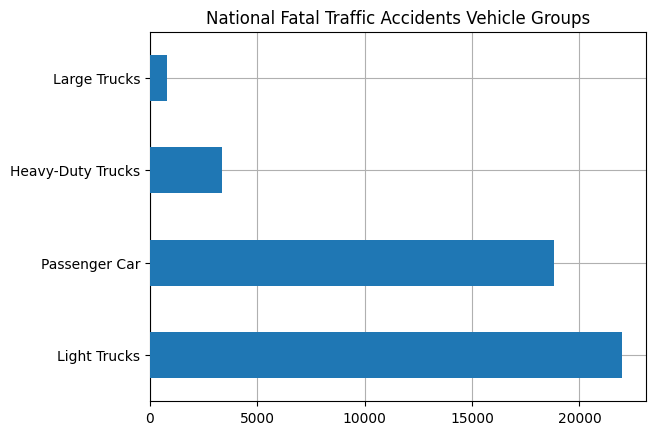

In [266]:
ax = farsVehVpicMergeDf["VehicleCroup"].value_counts().rename(vehicleGroupCat).plot.barh(title="National Fatal Traffic Accidents Vehicle Groups",zorder=3)
ax.grid(zorder=0)

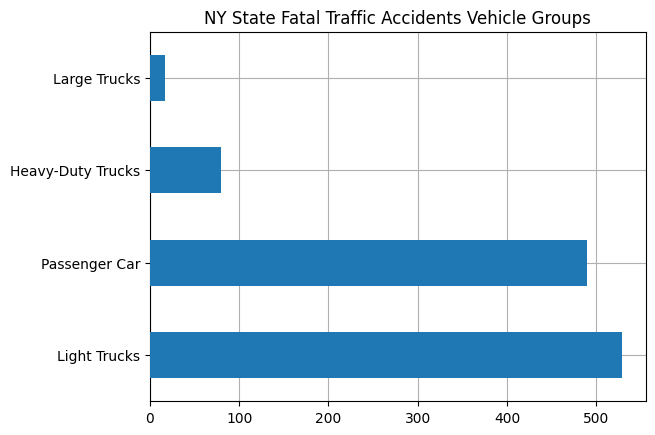

In [264]:
ax = farsVehVpicMergeDf[farsVehVpicMergeDf["STATE"]==36]["VehicleCroup"].value_counts().rename(vehicleGroupCat).plot.barh(title="NY State Fatal Traffic Accidents Vehicle Groups",zorder=3)
ax.grid(zorder=0)

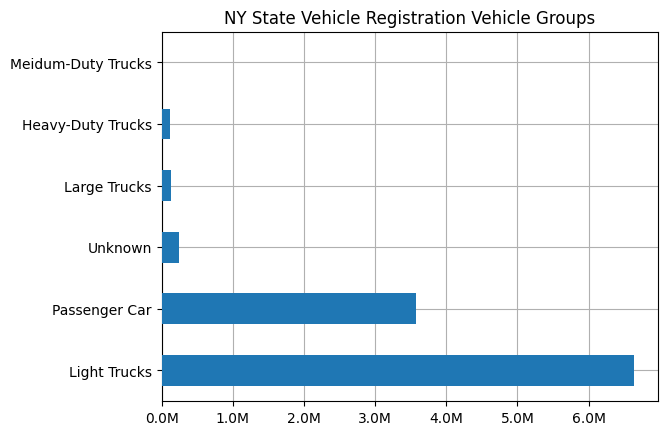

In [262]:
ax = nydmvVinDecodeDf["VehicleCroup"].value_counts().rename(vehicleGroupCat).plot.barh(title="NY State Vehicle Registration Vehicle Groups",zorder=3)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions))
ax.grid(zorder=0)